# 8 Step Of Machine Learning
* Data Gathering
* Data Pre-processing
* Feature Engeneering
* Choosing Model
* Traing Model
* Test MOdel/Model Evaluation
* Parameter Tuning
* Prediction

# Data Gathering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("FuelConsumption.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data Pre-processing

In [6]:
data.drop(columns=["MODELYEAR","MAKE","MODEL","VEHICLECLASS"], inplace=True)
data.head()

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


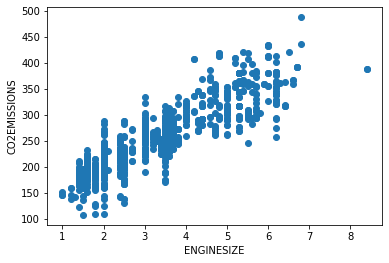

In [9]:
plt.scatter(data[["ENGINESIZE"]], data[["CO2EMISSIONS"]])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [ ]:
plt.scatter(data[["ENGINESIZE"]], data[["CO2EMISSIONS"]])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()
CYLINDERS	FUELTYPE	FUELCONSUMPTION_CITY	FUELCONSUMPTION_HWY	FUELCONSUMPTION_COMB

# Feature Engineering

In [ ]:
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]
X.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [ ]:
data.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

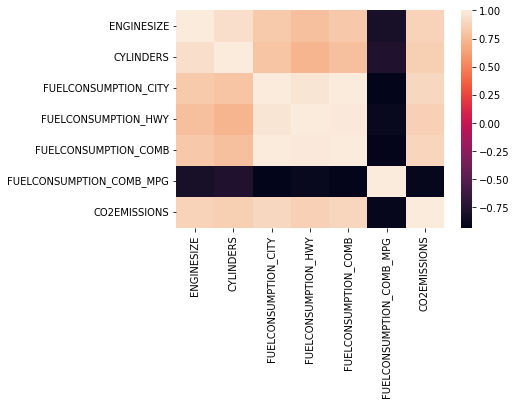

In [ ]:
corr = data.corr()
sns.heatmap(corr)

In [ ]:
data.drop(columns=["FUELCONSUMPTION_COMB_MPG"], inplace=True)
data.head()

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2.4,4,M6,Z,11.2,7.7,9.6,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,244


<AxesSubplot:>

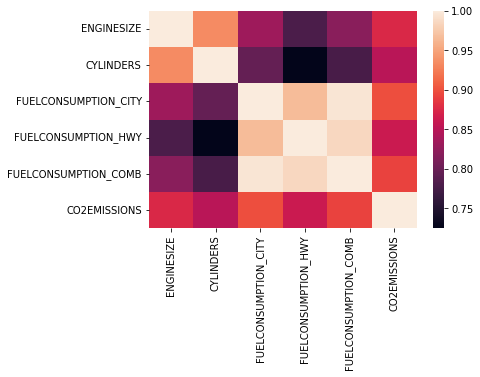

In [ ]:
corr = data.corr()
sns.heatmap(corr)

# Spliting data Training and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)  

In [ ]:
ytrain.shape
Xtrain.shape

(853, 1)

In [ ]:
Xtest.shape
ytest.shape

(214, 1)

# Choosing Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Model Initialize

In [ ]:
model = LinearRegression()
model

LinearRegression()

# Training Model

In [ ]:
model.fit(Xtrain.values, ytrain.values)

LinearRegression()

In [ ]:
## Theta 0
theta0 = model.intercept_

## Theta 1
theta1 = model.coef_


# Testing Model

In [ ]:
yhat = model.predict(Xtest.values)

# Error Validation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
mean_squared_error(yhat, ytest)
100 -mean_absolute_percentage_error(yhat, ytest) *100

90.05475159725387

# KFold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

low = 0
up = data.shape[0]
folds = KFold(n_splits = 5)
fold = 0
for train, test in folds.split(range(low, up)):
    
    # Training Data
    x = X.iloc[train]
    y = Y.iloc[train]
    
    # Training Data
    xt = X.iloc[test]
    yt = Y.iloc[test]

    # Model Init
    model = LinearRegression()

    # Training Model
    model.fit(x,y)

    # Testing Model
    yhat = model.predict(xt.values)
    fold += 1

    # Evaluation
    print(f"fold{fold}")
    print("======================")
    print("MAE: ",100 - mean_absolute_percentage_error(yhat, yt)*100)
    print("MSE: " ,mean_squared_error(yhat, yt))
    print("==========================")